In [1]:
from __future__ import print_function, division
%load_ext autoreload
%autoreload 2

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


from feature_selector import FeatureSelector

from sklearn import preprocessing


from IPython.display import display, HTML

In [2]:
# global settings
import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)

plt.figure(figsize=(10, 3))

plt.style.use('seaborn-whitegrid')

np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation

%matplotlib inline

In [3]:
df_raw = pd.read_csv("dados_func.csv")

# Objetivos
 Investigar as causas que fazem os funcionáriois deixarem seus empregos. 
 

**Questões**

1. Quais são os aspectos mais importantes e que são decisivos para os colaboradores deixarem seus empregos?
2. Qual a melhor forma de fazer estas previsões: regressão logística ou Random Forest (árvore de decisão)?

# Análise Exploratória

In [7]:
df_raw.shape

(14999, 10)

In [8]:
df_raw.head()

,nivel_satisfacao,ultima_avaliacao,numero_projetos,horas_medias_por_mes,tempo_empresa,acidente_trabalho,deixou_empresa,ultima_promocao_5anos,area,salario
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [9]:
df_raw.describe()

,nivel_satisfacao,ultima_avaliacao,numero_projetos,horas_medias_por_mes,tempo_empresa,acidente_trabalho,deixou_empresa,ultima_promocao_5anos
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


0    0.761917
1    0.238083
Name: deixou_empresa, dtype: float64

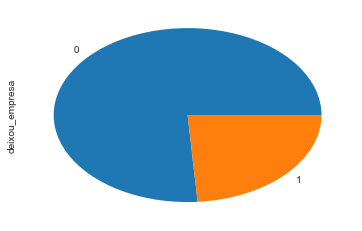

In [14]:
# Frequência da variável target (deixou_empresa)
# Pie Chart para a variável target


display(df_raw.deixou_empresa.value_counts() / len(df_raw) )


df_raw.deixou_empresa.value_counts().plot.pie()

In [17]:
# Frequência de acidentes de trabalho
df_raw.acidente_trabalho.value_counts() / df_raw.shape[0]

0    0.85539
1    0.14461
Name: acidente_trabalho, dtype: float64

In [24]:
# Frequência de promoção nos últimos 5 anos
df_raw.ultima_promocao_5anos.value_counts() / df_raw.shape[0]

0    0.978732
1    0.021268
Name: ultima_promocao_5anos, dtype: float64

Text(0.5,1,'Distribuição por salário')

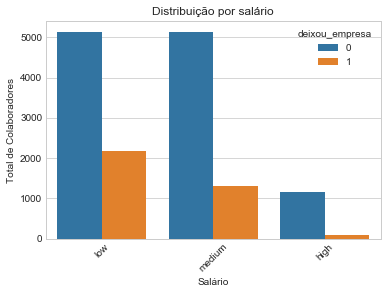

In [42]:
# Colaboradores por salario

sns.countplot(x="salario", data=df_raw, hue="deixou_empresa")
plt.xticks(rotation=45)
plt.xlabel ("Salário")
plt.ylabel ("Total de Colaboradores")
plt.title("Distribuição por salário")

Text(0.5,1,'Nível de satisfação')

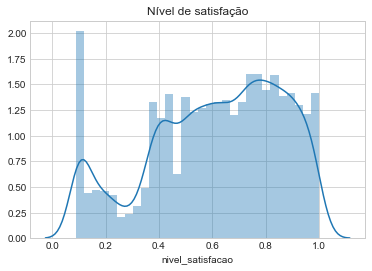

In [47]:
# Analisando o nível de satisfação
sns.distplot(df_raw.nivel_satisfacao)
plt.title("Nível de satisfação")

Text(0.5,1,'Última avaliação')

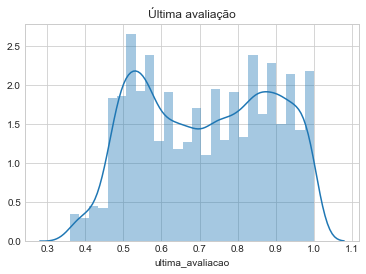

In [49]:
# Analisando a última avaliação
sns.distplot(df_raw.ultima_avaliacao)
plt.title("Última avaliação")

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

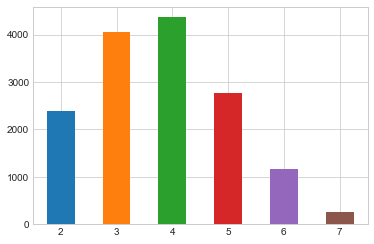

In [55]:
# Analisando o número de projetos

df_raw.numero_projetos.value_counts(sort=False).plot.bar()
plt.xticks(rotation=0)

Text(0.5,1,'Médias de horas trabalhadas no mês')

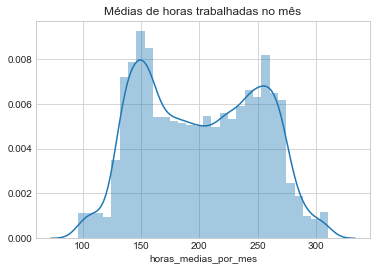

In [58]:
# Analisando o número médio de horas trabalhas por mês

sns.distplot(df_raw.horas_medias_por_mes)
plt.title("Médias de horas trabalhadas no mês")


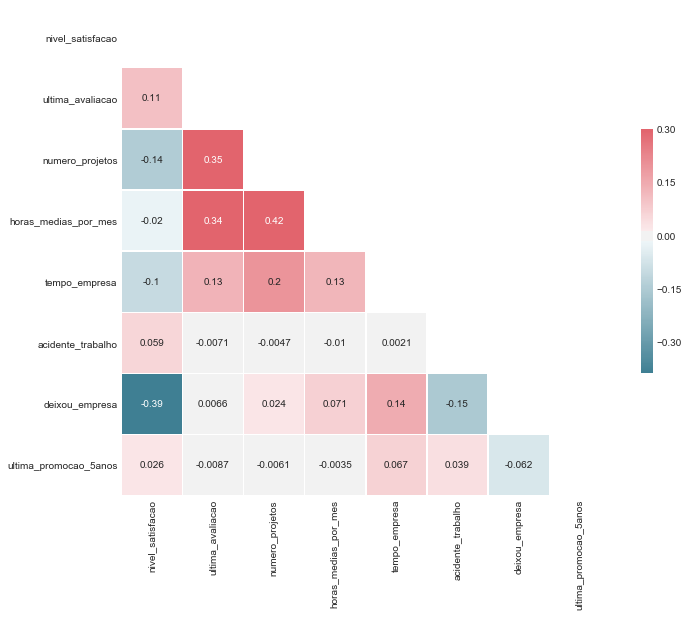

In [79]:
# Calculando a correlação

corr = df_raw.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


# --> Nível de satisfação tem a maior correlação negativa com a variável target.

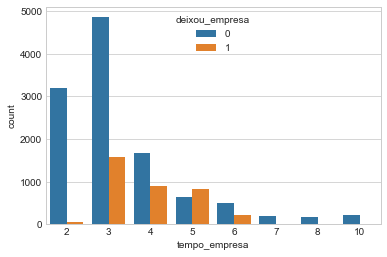

In [83]:
# Análise bivariada

# Tempo de trabalho na empresa
ax = sns.countplot(data=df_raw, x="tempo_empresa", hue="deixou_empresa")

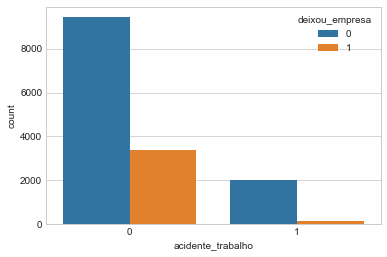

In [82]:
# Saída da empresa x Acidente de trabalho - Barplot

# Tempo de trabalho na empresa

ax = sns.countplot(data=df_raw, x="acidente_trabalho", hue="deixou_empresa")

In [85]:
# Saída da empresa x Acidente de trabalho - Crosstable
pd.crosstab(df_raw.deixou_empresa, df_raw.acidente_trabalho)

acidente_trabalho,0,1
deixou_empresa,,
0,9428,2000
1,3402,169


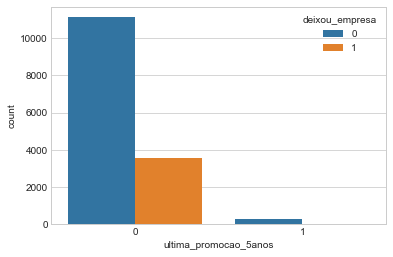

In [84]:
# Saída da empresa x Promoção nos últimos 5 anos - Crosstable

ax = sns.countplot(data=df_raw, x="ultima_promocao_5anos", hue="deixou_empresa")

Text(0.5,1,'Distribuição por departamento')

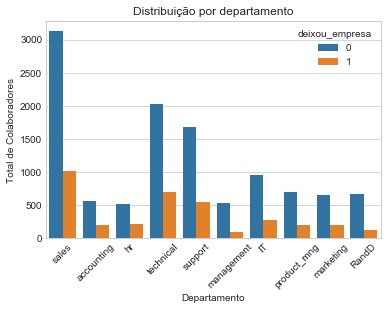

In [86]:
# Saída da empresa x Area - Aggregate



sns.countplot(x="area", data=df_raw, hue="deixou_empresa")
plt.xticks(rotation=45)
plt.xlabel ("Departamento")
plt.ylabel ("Total de Colaboradores")
plt.title("Distribuição por departamento")

# Preparando os Dados

In [89]:
train = df_raw.drop(["deixou_empresa"], axis=1)
train_labels = df_raw.deixou_empresa


# criar instância de FeatureSelector para seleção de features
# referencia: https://github.com/WillKoehrsen/feature-selector/blob/master/Feature%20Selector%20Usage.ipynb
fs = FeatureSelector(data = train, labels = train_labels)

0 features with greater than 0.60 missing values.

0 features with a single unique value.

0 features with a correlation magnitude greater than 0.97.

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[253]	valid_0's binary_logloss: 0.0412208	valid_0's auc: 0.997153
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[218]	valid_0's binary_logloss: 0.0497954	valid_0's auc: 0.99596
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[131]	valid_0's binary_logloss: 0.0616227	valid_0's auc: 0.994451
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[405]	valid_0's binary_logloss: 0.0473763	valid_0's auc: 0.994772
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[163]	valid_0's binary_logloss: 0.0584667	valid_0's auc: 0.993

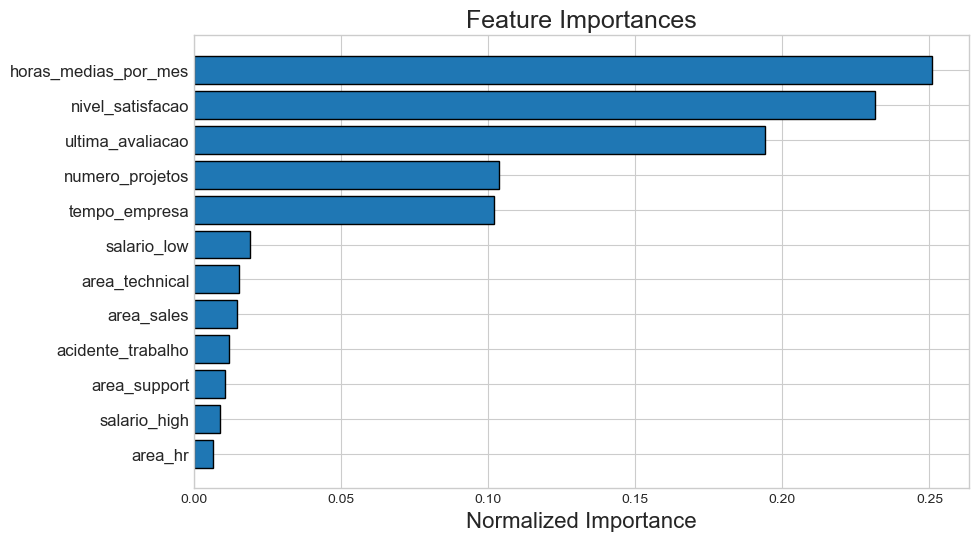

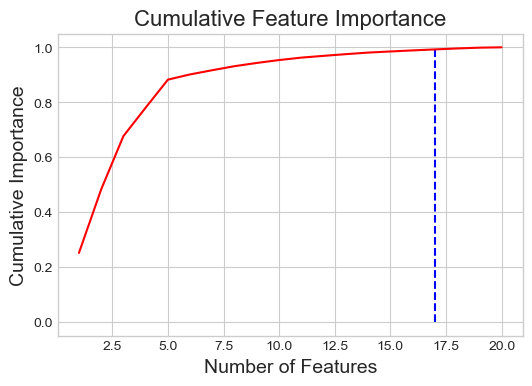

17 features required for 0.99 of cumulative importance


In [99]:

# verificar dados missing
fs.identify_missing(missing_threshold=0.6)

# verificar valores únicos
fs.identify_single_unique()

#verificar colinearidade
fs.identify_collinear(correlation_threshold=0.975)



# Zero Importance Features
fs.identify_zero_importance(task = 'classification', eval_metric = 'auc', 
                            n_iterations = 10, early_stopping = True)


# Low Importance Features
fs.identify_low_importance(cumulative_importance = 0.99)


# Plot Feature Importances
fs.plot_feature_importances(threshold = 0.99, plot_n = 12)

In [98]:
fs.feature_importances.head(12)

,feature,importance,normalized_importance,cumulative_importance
0,horas_medias_por_mes,1464.6,0.247065,0.247065
1,nivel_satisfacao,1392.8,0.234953,0.482018
2,ultima_avaliacao,1148.7,0.193775,0.675793
3,numero_projetos,622.0,0.104926,0.780719
4,tempo_empresa,607.6,0.102497,0.883215
5,salario_low,104.7,0.017662,0.900877
6,area_technical,93.1,0.015705,0.916582
7,acidente_trabalho,86.1,0.014524,0.931107
8,area_sales,66.5,0.011218,0.942325
9,salario_high,63.6,0.010729,0.953053


In [106]:
# Remover features identificadas sem importância

train_removed = fs.remove(methods = 'all', keep_one_hot=True)


# remover area e salario

train_removed = train_removed.drop(["area", "salario"], axis=1)

train_removed.head().T


['missing', 'single_unique', 'collinear', 'zero_importance', 'low_importance'] methods have been run

Removed 4 features.


,0,1,2,3,4
area_IT,0.00,0.00,0.00,0.00,0.00
area_RandD,0.00,0.00,0.00,0.00,0.00
area_hr,0.00,0.00,0.00,0.00,0.00
area_product_mng,0.00,0.00,0.00,0.00,0.00
area_sales,1.00,1.00,1.00,1.00,1.00
area_support,0.00,0.00,0.00,0.00,0.00
area_technical,0.00,0.00,0.00,0.00,0.00
salario_high,0.00,0.00,0.00,0.00,0.00
salario_low,1.00,0.00,0.00,1.00,1.00
salario_medium,0.00,1.00,1.00,0.00,0.00


# Criar baseline model

In [115]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(train_removed)


X = train_removed
y = train_labels

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

In [120]:
# criar e treinar modelo de regressao logistica

lr = LogisticRegression(random_state=0, solver='lbfgs',  multi_class='multinomial').fit(X_train, y_train)



## Avaliando o modelo base

In [144]:
def evaluate(clf, X, y):
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    
    y_pred = clf.predict(X)
    
    print ("Acurácia: {}".format(clf.score(X, y)))
    
    
    confusion_matrix = confusion_matrix(y, y_pred)
    print ("Confusion Matrix")
    print(confusion_matrix)
    print(classification_report(y, y_pred))
    
    logit_roc_auc = roc_auc_score(y, clf.predict(X_test))

    fpr, tpr, thresholds = roc_curve(y, clf.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()

Acurácia: 0.7913131313131313
Confusion Matrix
[[3490  281]
 [ 752  427]]
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      3771
           1       0.60      0.36      0.45      1179

   micro avg       0.79      0.79      0.79      4950
   macro avg       0.71      0.64      0.66      4950
weighted avg       0.77      0.79      0.77      4950



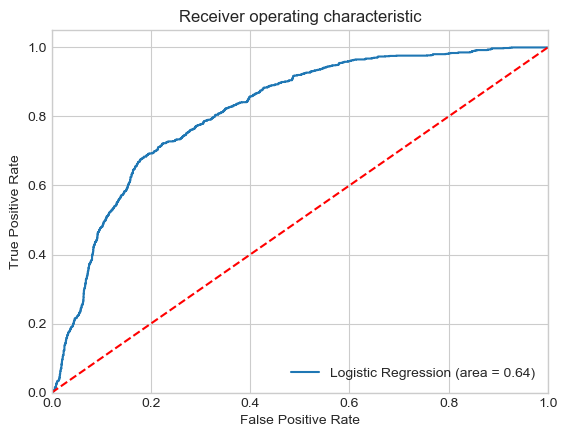

In [145]:
evaluate(lr, X_test, y_test)

## Criar modelo Random Forest

Acurácia: 0.9749494949494949
Confusion Matrix
[[3729   42]
 [  82 1097]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3771
           1       0.96      0.93      0.95      1179

   micro avg       0.97      0.97      0.97      4950
   macro avg       0.97      0.96      0.97      4950
weighted avg       0.97      0.97      0.97      4950



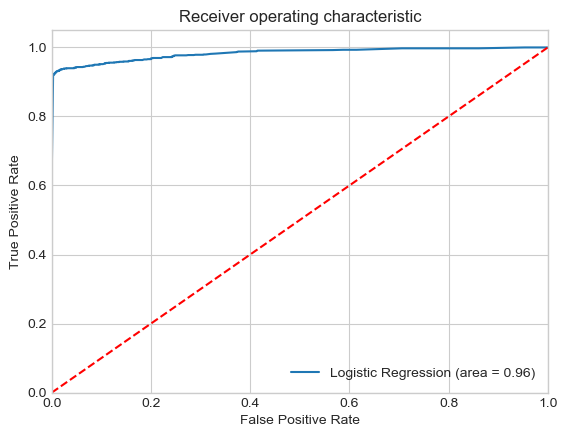

In [149]:
from sklearn.ensemble import  RandomForestClassifier
rf = RandomForestClassifier(random_state=46,  max_features=.5, max_depth=5).fit(X_train, y_train)

# avaliando modelo
evaluate(rf, X_test, y_test)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

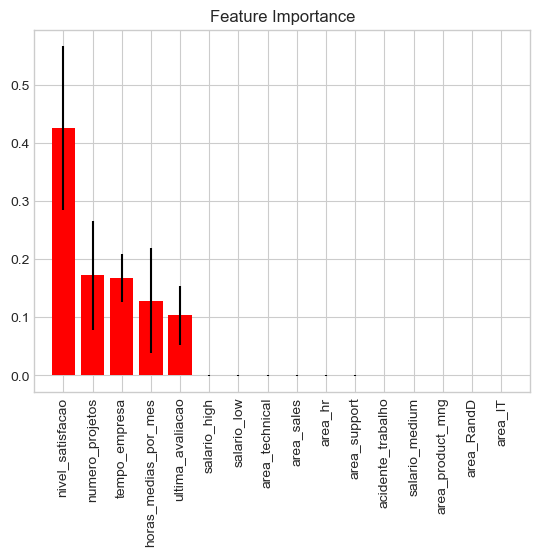

In [151]:
from scikitplot.estimators import plot_feature_importances

plot_feature_importances(rf, feature_names=X_train.columns)
plt.xticks(rotation = 90)